#### Install yfinance

In [14]:
# Python
import pandas as pd
from prophet import Prophet

# Forecasting Stocks from Yahoo Finance with Prophet

In [15]:
import yfinance as yf

# Google
googl = yf.Ticker('GOOGL')

hist = googl.history(period="max", auto_adjust=True)


In [16]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None) # Romve the time zone
df['y'] = hist['Close'].values # Close price

df.tail()

,ds,y
5089,2024-11-06,176.509995
5090,2024-11-07,180.750000
5091,2024-11-08,178.350006
5092,2024-11-11,180.350006
5093,2024-11-12,181.619995


In [17]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3erv3_g9/a04jjh0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3erv3_g9/uctstsfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93412', 'data', 'file=/tmp/tmp3erv3_g9/a04jjh0z.json', 'init=/tmp/tmp3erv3_g9/uctstsfq.json', 'output', 'file=/tmp/tmp3erv3_g9/prophet_modelmo4w8wom/prophet_model-20241113032136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
future = m.make_future_dataframe(365) # predict 365 days

forecast = m.predict(future)
#The predict method will assign each row in future a predicted value which it names yhat.
#The forecast object here is a new dataframe that includes a column yhat with the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
5449,2025-11-03,171.948054,158.786434,184.395466
5450,2025-11-04,171.961380,159.719864,183.277873
5451,2025-11-05,171.994974,158.978433,185.430026
5452,2025-11-06,172.069168,159.163065,184.679663
5453,2025-11-07,172.150683,159.056157,185.527718
5454,2025-11-08,171.141390,158.434031,182.787097
5455,2025-11-09,171.192954,159.315939,184.323629
5456,2025-11-10,172.352770,159.603634,185.157179
5457,2025-11-11,172.343456,160.011100,185.325606
5458,2025-11-12,172.352603,159.292562,185.287060


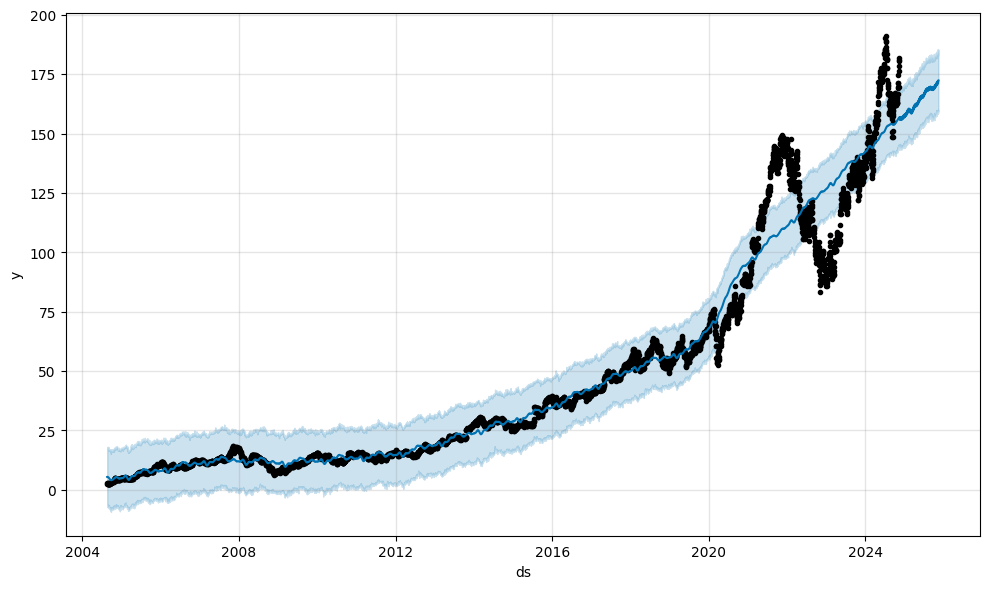

In [19]:
m.plot(forecast);